In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

##### Task 1
Derive an explicit formula for calculating the values of a random variable ξ with a distribution function

$$ F(x) = 1 - {2 e^{-x} + e^{-5x} \over 3} $$
$$ \gamma = 1 - F(x)$$
$$ \gamma = {2 e^{-x} + e^{-5x} \over 3}$$
$$ \widetilde \gamma = \gamma + o(e^{-x})= {2 \over 3}e^{-x} + o(e^{-x})$$

$$ \widetilde \gamma = 1 - F(x) + o(e^{-x}) $$
$$ F(x) = 1 - \widetilde \gamma + o(e^{-x}) $$

$$ F(x) = 1 - {2 \over 3} e^{-x} + o(e^{-x}) $$
$$ e^{-x} = {3 \over 2}(1 - F(x) + o(e^{-x}))$$
$$ -x = ln \left({3 \over 2}(1 - F(x) + o(e^{-x})) \right)$$
$$ x = ln \left({2 \over 3(1 - F(x)) + o(e^{-x})} \right)$$
$$ \xi = ln \left({2 \over 3 \gamma + o(e^{-x})} \right)$$

if $ \gamma = F(x) = 1 -{2 e^{-x} + e^{-5x} \over 3} $
$$ \xi = ln \left({2 \over 3(1 - \gamma) + o(e^{-x})} \right)$$


In [2]:
def gamma(x):
    return 1 - (2 * np.exp(-x) + np.exp(-5 * x)) / 3

In [3]:
def gamma_tilde(x):
    return 1 - (2 * np.exp(-x)) / 3

In [4]:
def xi(x, gm):
    return np.log(2 / (3 * (1 - gm(x))))

In [5]:
def get_plot(foo_1, foo_2, param=5):
    print(abs(foo_1(param) - foo_2(param)))
    plt.rcParams['font.size'] = '10'
    fig, ax = plt.subplots()
    ax.plot()
    plt.plot(np.linspace(0, param, 10 ** 5), foo_1(np.linspace(0, param, 10 ** 5)), label=foo_1.__name__)
    plt.plot(np.linspace(0, param, 10 ** 5), foo_2(np.linspace(0, param, 10 ** 5)), label=foo_2.__name__)

    ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
    plt.legend(loc = 'best', fancybox = True, shadow = True)


    fig.set_figwidth(7)
    fig.set_figheight(5)

    plt.title(f'')
    plt.show()

1.5133309920867255e-05


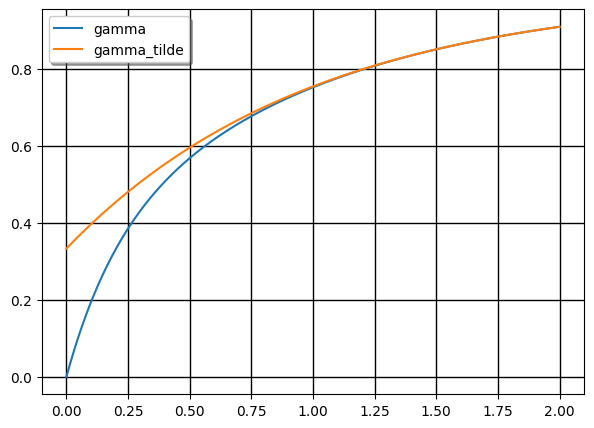

4.629296945779515e-12


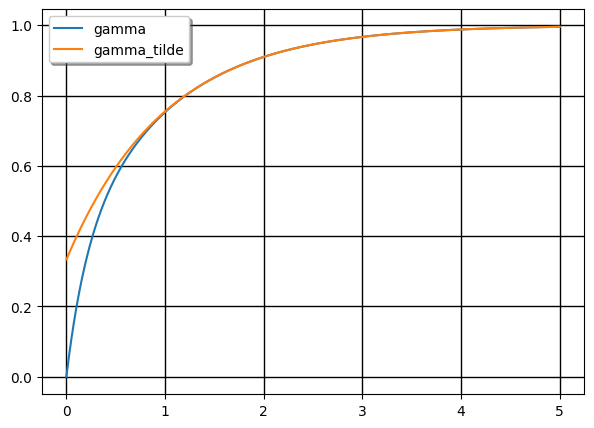

In [6]:
get_plot(gamma, gamma_tilde, 2)
get_plot(gamma, gamma_tilde, 5)


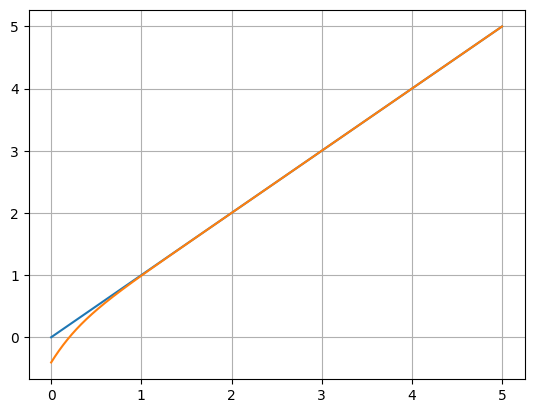

In [7]:
# композиция функций
param = 5
plt.grid(True)
plt.plot(np.linspace(0, param, 10 ** 5), xi(np.linspace(0, param, 10 ** 5), gamma_tilde))
plt.plot(np.linspace(0, param, 10 ** 5), xi(np.linspace(0, param, 10 ** 5), gamma))
plt.show()

##### Task 2

$$ R_{1}^{2} \leq x^{2} + y^{2} \leq R_{2}^{2}$$
$$
\begin{cases}
 & x = r cos(\phi) \\ 
 & y = r sin(\phi) 
\end{cases}
$$
$$ R_{1}^{2} \leq r^{2} \leq R_{2}^{2}$$
$$  c(\phi, r) = {1 \over S_{ring}} = {1 \over \pi (R_{2}^{2} - R_{1}^{2})} $$
$$  C(\phi, r) = F(\phi)F(r) $$
$$
\begin{cases}
 & F_{\theta_{1}}(\phi) = \gamma_{1} = {\phi \over 2\pi}  \\
 & F_{\theta_{2}}(r) = \gamma_{2} =  {r^{2} - R_{1}^{2} \over R_{2}^{2} - R_{1}^{2}} 
\end{cases}
$$

$$
\begin{cases}
 & \theta_{1} = \gamma_{1} 2 \pi \\
 & \theta_{2} = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})}
\end{cases}
$$

$$
\begin{cases}
 & \xi_{1} = \theta_{2} cos(\theta_{1}) = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})} cos(\gamma_{1} 2 \pi) \\

 & \xi_{2} = \theta_{2} sin(\theta_{1}) = \sqrt{R_{1}^{2} + \gamma_{2} (R_{2}^{2} - R_{1}^{2})} sin(\gamma_{1} 2 \pi)
\end{cases}
$$

##### Task 6
Calculate the Monte Carlo payoff of a European call option and compare it with the exact Black-Scholes formula.    The volatility σ is constant



$$ d S_{t} = r S_{t} dt + \sigma S_{t} dW_{t}$$
$$ dW_{t} \sim N\left(0, {T \over N} \right)$$


In [8]:
def BSM_numerical(S, r, sigma, dt):
    return r * S * dt + sigma * S * np.random.normal(0, np.sqrt(dt))

$$ S(T) = S(0) exp\left((r - {\sigma^{2}  \over 2})T + \sigma \sqrt{T} z\right)  $$
$$ z \sim N(0, 1) $$

In [9]:
def BSM(S_0, r, sigma, T):
    return S_0 * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * np.random.normal(0, 1))

$$ BS(S(0), \sigma, T, r, K) = S(0) Ф\left({log({S(0) \over K}) + (r + {\sigma^{2} \over 2})T \over \sigma \sqrt{T}} \right) - e^{-rT}KФ\left({log({S(0) \over K}) + (r - {\sigma^{2} \over 2})T \over \sigma \sqrt{T}} \right)  $$

In [10]:
def BS_exact(S_0, sigma, T, r, K):
    d_plus = norm.cdf((np.log(S_0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))) 
    d_minus = norm.cdf((np.log(S_0 / K) + (r - (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T)))
    return S_0 * d_plus - np.exp(-r * T) * K * d_minus

$$ payoff(S(T), K) = (S(T) - K)^{+} $$

In [11]:
def BSM_payoff(S):
    global strike
    if S > strike:
        return S - strike
    return 0

In [12]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10 ** 4

In [13]:
print('numerical solution:', np.mean(np.vectorize(BSM_payoff)(S_0 + np.array([BSM_numerical(S_0, r, sigma, T) for i in range(N)]))))
print('analytical solution:', np.mean(np.vectorize(BSM_payoff)(([BSM(S_0, r, sigma, T) for i in range(N)]))))

numerical solution: 1.774
analytical solution: 2.292599563615668


In [14]:
def BSM_two_methods(S, r, sigma, T, dt):
    z = np.random.normal(0, np.sqrt(dt))
    return r * S * dt + sigma * S * z, S * np.exp((r - (sigma ** 2) / 2) * T + sigma * np.sqrt(T) * z)

In [15]:
# сначала считаются средние payoff без дисконтирования, затем домножаются на диск. множитель
# т.к. r - const, то можно вынести константу за знак мат. ожидания
ans = np.mean([np.vectorize(BSM_payoff)
               (np.array([S_0 + BSM_two_methods(S_0, r, sigma, T, T)[0], 
                          BSM_two_methods(S_0, r, sigma, T, T)[1]]))  for i in range(N)], axis=0) * np.exp(-r * T)
print('payoff:')
print('numerical solution:', ans[0])
print('analytical solution:', ans[1])
print('exact solution:', BS_exact(S_0, sigma, T, r, strike))

payoff:
numerical solution: 1.9625117950588282
analytical solution: 1.9540409371234473
exact solution: 2.0616301851268855


##### Task 7
Calculate the Monte Carlo payoff of an Asian call option. The volatility σ is constant.

In [16]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10 ** 4
period_counts = 10

In [17]:
S_numerical = np.zeros((N, period_counts))
S_numerical[:, 0] = S_0
S_analytical = np.zeros((N, period_counts))
S_analytical[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_two_methods(S_numerical[i, t - 1], r, sigma, T, T / period_counts)
        S_numerical[i, t] = S_numerical[i, t - 1] + temp[0]
        S_analytical[i, t] = temp[1]

print('numerical:')
print('average price of average prices:', np.mean(np.mean(S_numerical, axis=1), axis=0))
print('payoff:', BSM_payoff(np.mean(np.mean(S_numerical, axis=1), axis=0)) * np.exp(-r * T))
print()

(np.mean(S_analytical[:, 1]) - strike) * np.exp(-r * T)

numerical:
average price of average prices: 20.93911381595429
payoff: 0.8497453204699769



1.821639917794126

##### Task 8
Calculate the Monte Carlo payoff of a European call option if the volatility depends on price $ \sigma = \sigma(S(t))$

In [18]:
S_0, r, sigma, T = 20, 0.1, 0.5, 1
strike, N = 20, 10 ** 4
period_counts = 10

In [22]:
S_0, r, sigma, T = 20, 0.1, 0.1, 1
strike, N = 20, 10 ** 4
period_counts = 12

S_numerical = np.zeros((N, period_counts))
S_numerical[:, 0] = S_0

for i in range(N):
    for t in range(1, period_counts):
        temp = BSM_numerical(S_numerical[i, t - 1], r, sigma, T / period_counts)
        S_numerical[i, t] = S_numerical[i, t - 1] + temp

print('europian call-option payoff:', BSM_payoff(np.mean(S_numerical[:, period_counts - 1], axis=0)) * np.exp(-r * T))
print('asian call-option payoff:', BSM_payoff(np.mean(np.mean(S_numerical, axis=1), axis=0)) * np.exp(-r * T))

europian call-option payoff: 1.7065450060552774
asian call-option payoff: 0.8404211231885
